##### Linear Convolution

##### DATE: 08/09/2023

##### AIM:
Write a program to find linear convolution using :
1. Mathematical expression/ Direct equation
2. Toeplitz matrix


##### SOFTWARE USED:
Python

##### THEORY:
1. DIRECT METHOD :
<p>Given an LTI (Linear Time Invariant) system with impulse response h[n] and an input sequence x[n], the output of the system y[n] is obtained by convolving the input sequence and impulse response.</p>

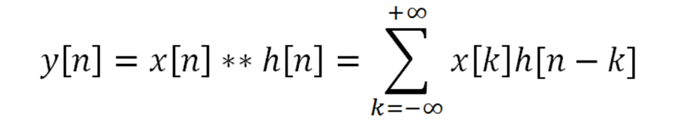

where, the sequence is of length N and is of length M.

2.  TOEPLITZ METHOD:
When the sequences and are represented as matrices, the convolution operation can be equivalently represented as :

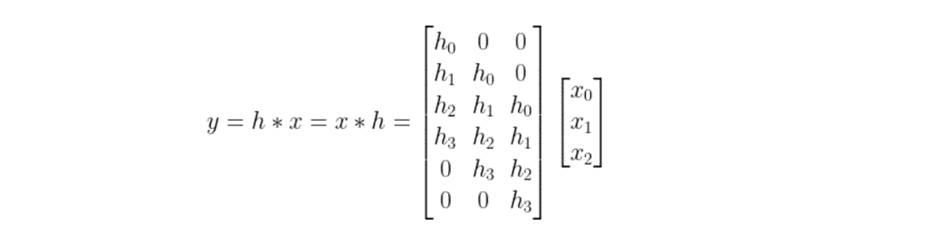

The matrix representing the incremental delays of h[n] used in the above equation is a special form of matrix called Toeplitz matrix. Toeplitz matrixes have constant entries along their diagonals. Toeplitz matrices are used to model systems that posses shift invariant properties. The property of shift invariance is evident from the matrix structure itself. Since we are modeling a Linear Time Invariant system, Toeplitz matrices are our natural choice.

##### CODE:


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
ft = np.array(input("Enter the elements of the input sequence:").split(",")).astype(int)
gt = np.array(input("Enter the elements of the impulse response:").split(",")).astype(int)
ftn=ft
hn=gt
length = len(ft) + len(gt) - 1
y = np.zeros(length)
if len(ft)<len(gt):
  (ft,gt) = (gt,ft)
if len(ft)!=len(gt):
  if len(ft)>len(gt):
    z = np.zeros(len(ft)-len(gt)).astype(int)
    gt = np.concatenate((gt,z))
print(ft,gt)
size = len(ft) # the value of k
#convolution operation:
for i in range (length):#n
  sum=0
  for j in range(size):#k
    w = i-j
    if (w < 0) or (w > size-1): #no negative index, also index should not be out of bounds
      sum+=0
    else:
      sum+=ft[j]*gt[w]
  y[i] = sum
print("The output sequence (using mathematical function) is:", y.astype(int))

#verifying the output
print("The output sequence (using numpy.convolve) is:", np.convolve(ftn,hn))
    



[1 2 3 4 5] [1 2 3 4 0]
0 0 0
1 0 1
1 1 0
2 0 2
2 1 1
2 2 0
3 0 3
3 1 2
3 2 1
3 3 0
4 0 4
4 1 3
4 2 2
4 3 1
4 4 0
5 1 4
5 2 3
5 3 2
5 4 1
6 2 4
6 3 3
6 4 2
7 3 4
7 4 3
The output sequence (using mathematical function) is: [ 1  4 10 20 30 34 31 20]
The output sequence (using numpy.convolve) is: [ 1  4 10 20 30 34 31 20]


: 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
ft = np.array(input("Enter the elements of the input sequence:").split(",")).astype(int)
gt = np.array(input("Enter the elements of the impulse response:").split(",")).astype(int)

row = len(ft)
column = len(ft)+len(gt)-1

if len(gt)<column:
  z = np.zeros(column-len(gt))
  gt= np.concatenate((gt,z))

#toeplitz matrix
toeplitz = gt
print(gt)
for i in range (row-1):
  gt= np.roll(gt,1) #to cirular shift elements of array
  toeplitz = np.concatenate((toeplitz,gt))
toeplitz.shape = (row,column)
print(toeplitz)
toeplitz = np.transpose(toeplitz)
print(toeplitz)

print("The output sequence (using toeplitz matrix) is:",np.dot(toeplitz,ft).astype(int))
#verifying the output
print("The output sequence (using numpy.convolve) is:", np.convolve(ft,gt))

[2. 1. 3. 3. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[2. 1. 3. 3. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 1. 3. 3. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 1. 3. 3. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 1. 3. 3. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 1. 3. 3. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 1. 3. 3. 4. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 1. 3. 3. 4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 1. 3. 3. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 3. 3. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 3. 3. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 3. 3. 4. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 3. 3. 4. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 3. 3. 4.]]
[[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 3. 3. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 3. 3. 1. 2. 0. 0. 0. 0. 0.

##### RESULT: 
Successfully performed linear convolution using direct method and toeplitz method.